### Simulate Circuits Using the `quantum_info` Module

In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

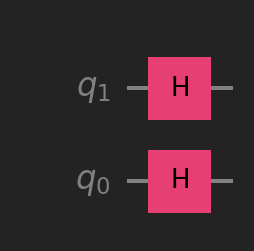

In [2]:
qc = QuantumCircuit(2)
qc.h([1,0])
qc.draw()

In [3]:
ψ = qi.Statevector(qc)
ψ

<IPython.core.display.Latex object>

In [4]:
probs = ψ.probabilities()
print(probs)

[0.25 0.25 0.25 0.25]


In [5]:
counts = ψ.sample_counts(shots=1024)
print(counts)

{'00': 273, '01': 233, '10': 243, '11': 275}


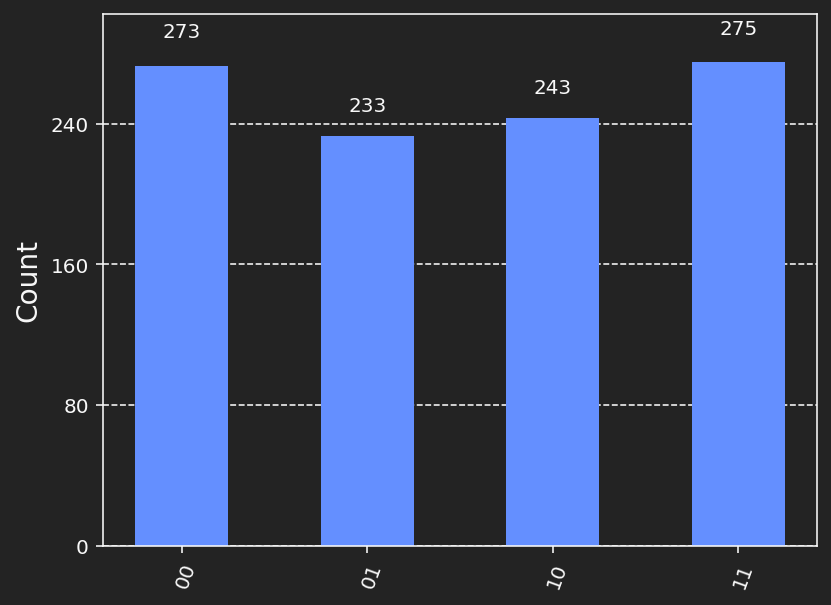

In [6]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [7]:
samples = ψ.sample_memory(shots=10)
print(samples)

['00' '01' '01' '11' '11' '10' '00' '10' '00' '10']


In [8]:
O = qi.SparsePauliOp(['ZZ','XX','II'],[0.2,-0.3,0.4])
O.to_operator()

Operator([[ 0.6+0.j,  0. +0.j,  0. +0.j, -0.3+0.j],
          [ 0. +0.j,  0.2+0.j, -0.3+0.j,  0. +0.j],
          [ 0. +0.j, -0.3+0.j,  0.2+0.j,  0. +0.j],
          [-0.3+0.j,  0. +0.j,  0. +0.j,  0.6+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [9]:
O_exp = ψ.expectation_value(O)
print(O_exp)

(0.10000000000000003+0j)


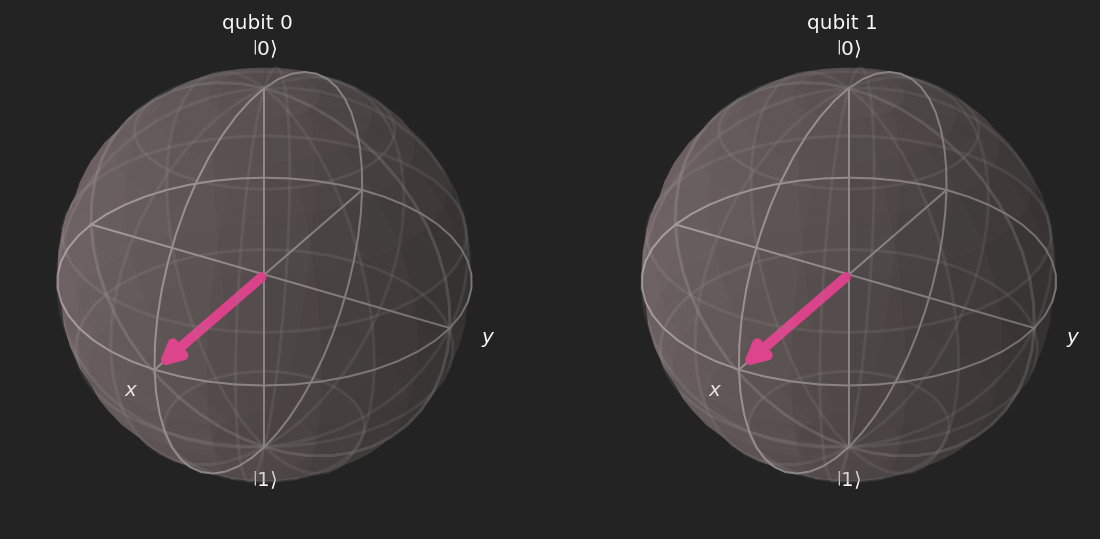

In [10]:
ψ.draw('bloch')

In [11]:
ρ = qi.DensityMatrix(qc)
ρ

<IPython.core.display.Latex object>

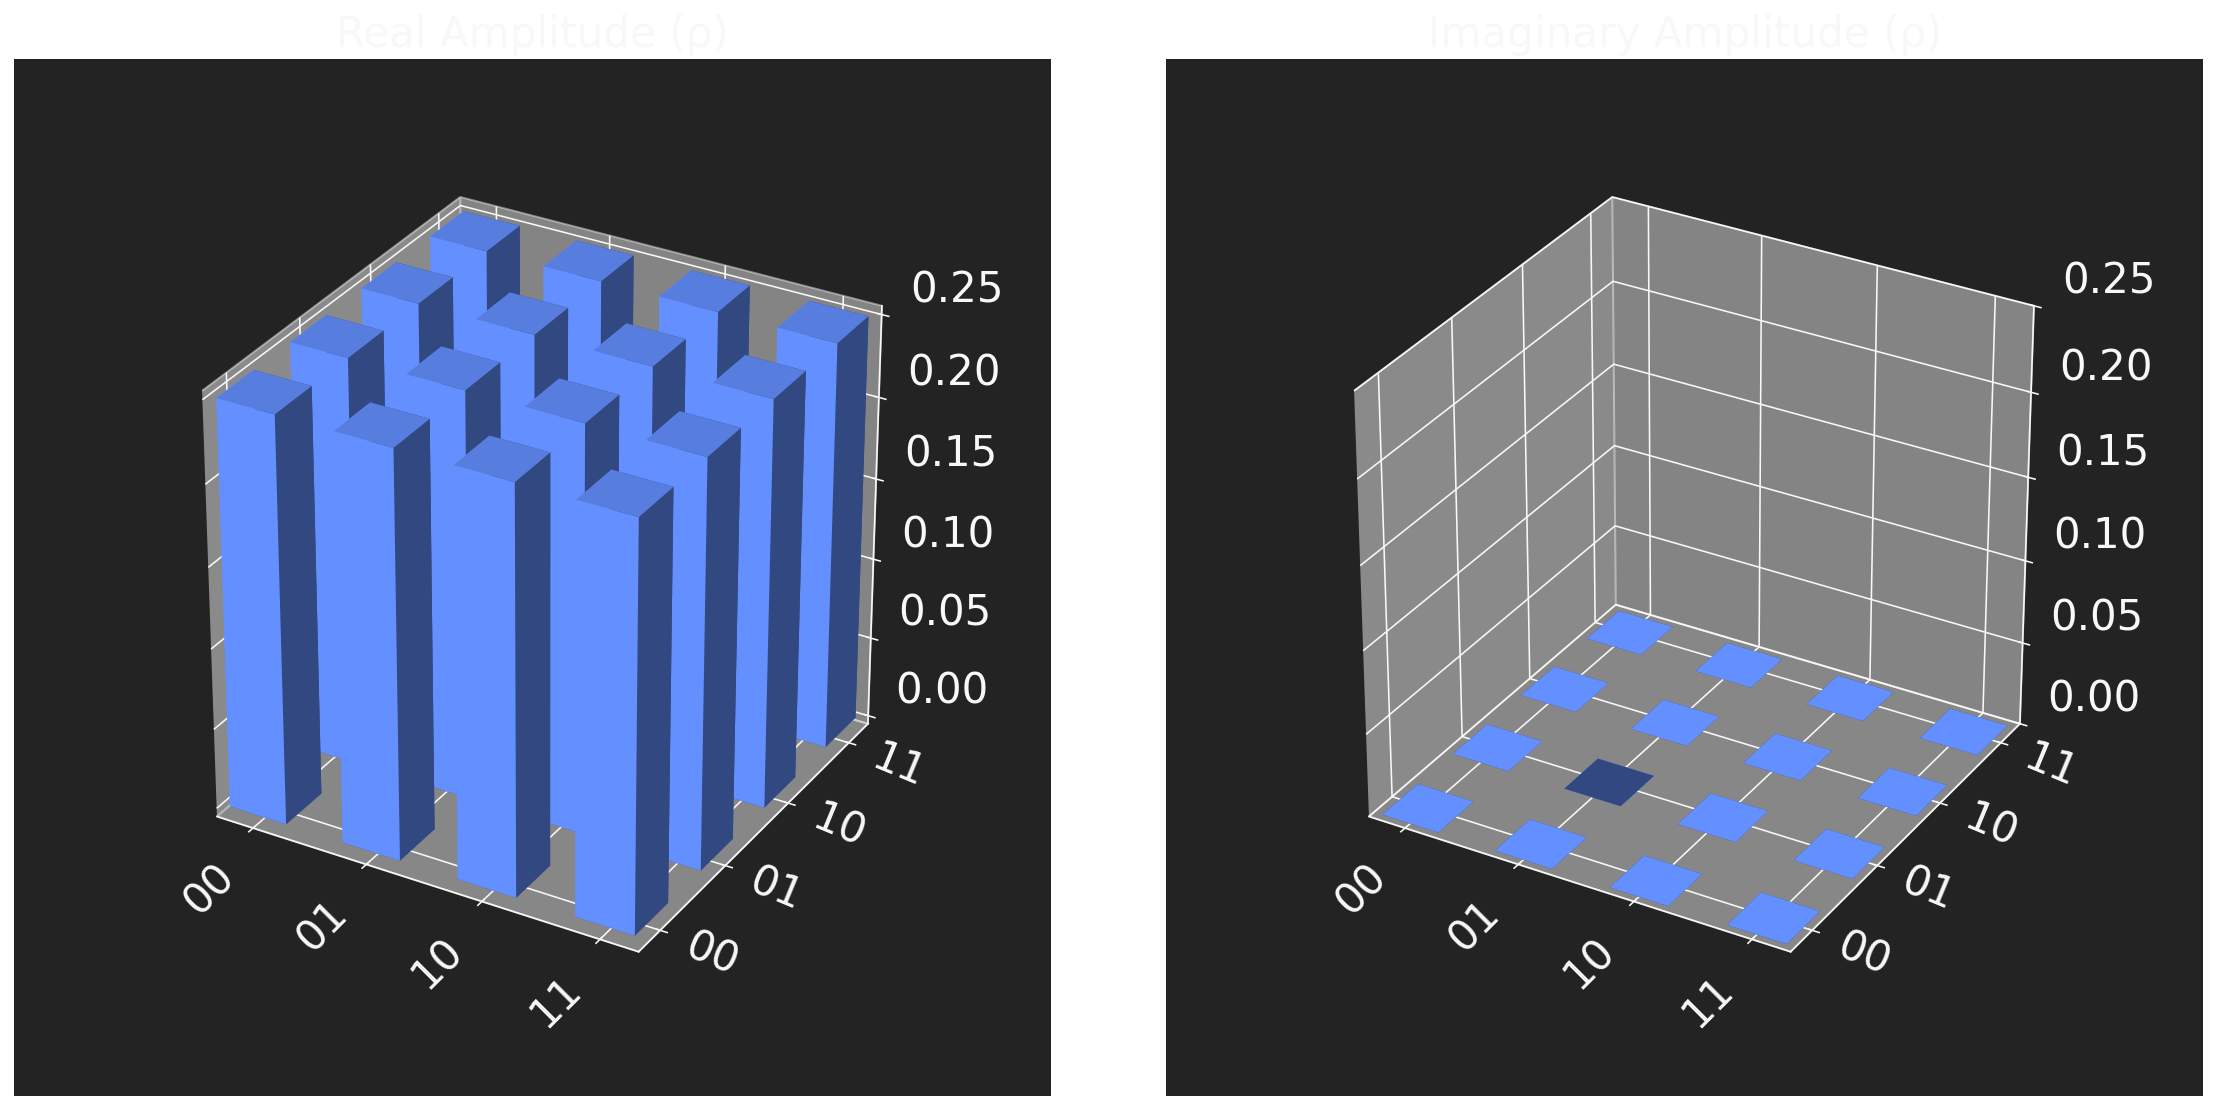

In [12]:
ρ.draw('city')

In [13]:
ρ1 = qi.partial_trace(ρ,[0])
ρ1

<IPython.core.display.Latex object>

In [14]:
U = qi.Operator(qc)
U

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


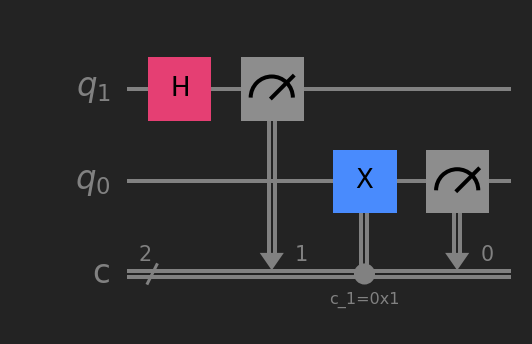

In [15]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.x(0).c_if(1,1)
qc.measure(0,0)
qc.draw()

In [16]:
ψ = qi.Statevector(qc)
ψ

QiskitError: 'Cannot apply instruction with classical bits: measure'

### Simulate Circuits Using `BasicSimulator`

In [17]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()

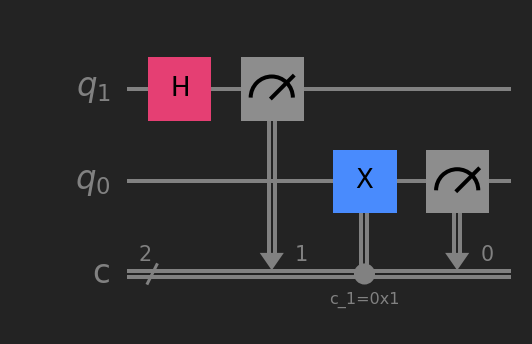

In [18]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.x(0).c_if(1,1)
qc.measure(0,0)
qc.draw()

In [19]:
job = simulator_basic.run(qc, shots=1024)
result = job.result()
print(result)

Result(backend_name='basic_simulator', backend_version='0.1', qobj_id='e8fca0b7-ec88-4283-a391-cae92ae30593', job_id='0f23473d-2433-4277-a762-502c9281b6aa', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 510, '0x0': 514}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1]], n_qubits=2, qreg_sizes=[['q', 2]], clbit_labels=[['c', 0], ['c', 1]], memory_slots=2, creg_sizes=[['c', 2]], name='circuit-170', global_phase=0.0, metadata={}), status=DONE, name='circuit-170', seed_simulator=1949313163, time_taken=0.02761077880859375)], date=None, status=COMPLETED, header=QobjHeader(backend_name='basic_simulator', backend_version='0.1'), time_taken=0.027620792388916016)


In [20]:
counts = result.get_counts()
print(counts)

{'11': 510, '00': 514}


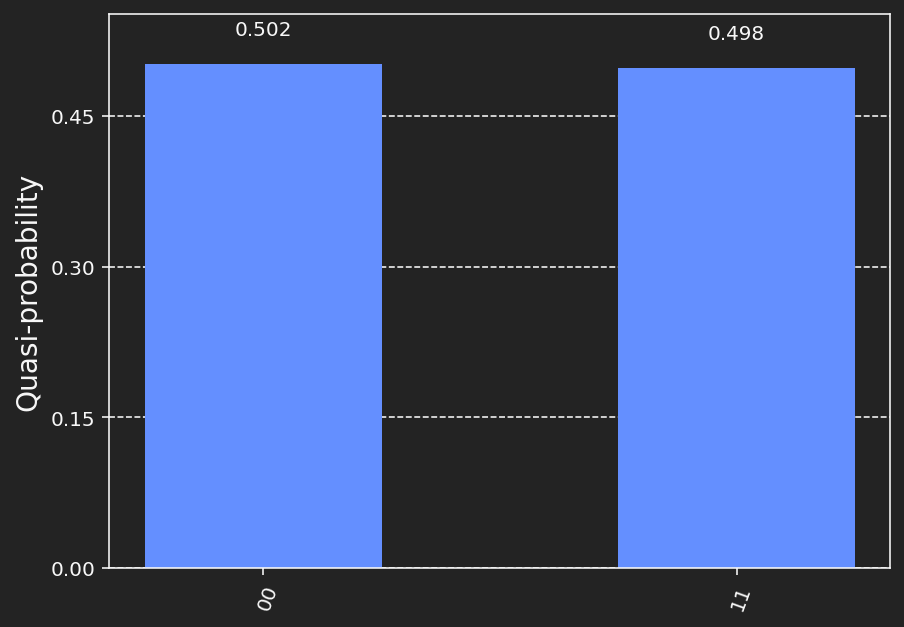

In [21]:
from qiskit.visualization import plot_histogram, plot_distribution
plot_distribution(counts)

In [22]:
job = simulator_basic.run(qc, shots=10, memory=True)
result = job.result()
samples = result.get_memory()
print(samples)

['00', '00', '00', '00', '11', '00', '00', '00', '00', '00']


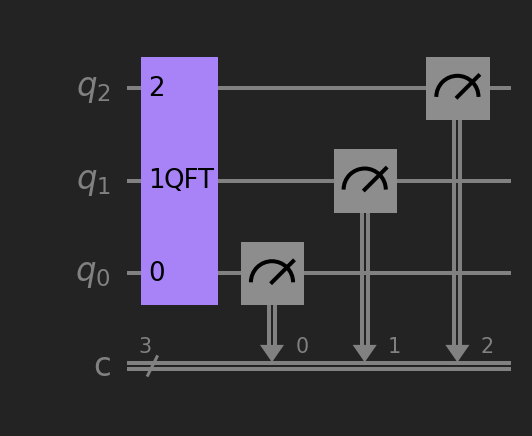

In [23]:
from qiskit.circuit.library import QFT

qc = QuantumCircuit(3,3)
qc.append(QFT(3), range(3))
qc.measure(range(3),range(3))
qc.draw()

In [24]:
job = simulator_basic.run(qc, shots=1024)

BasicProviderError: 'basic_simulator encountered unrecognized operation "QFT"'

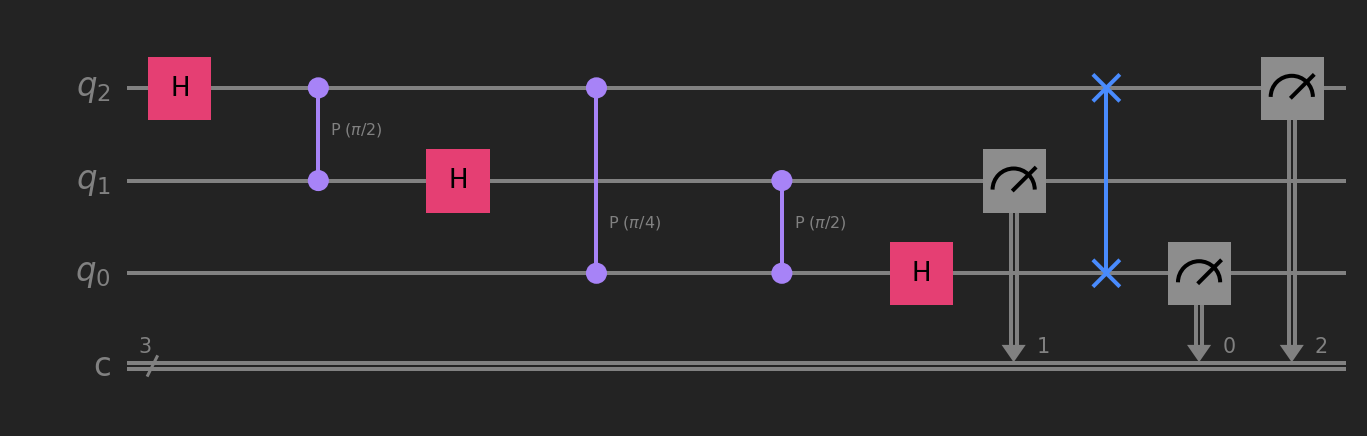

In [25]:
from qiskit import transpile

qc_basic = transpile(qc, backend=simulator_basic)
qc_basic.draw()

In [26]:
result = simulator_basic.run(qc_basic, shots=1024).result()
counts = result.get_counts()
print(counts)

{'100': 137, '101': 118, '010': 137, '001': 124, '110': 115, '000': 120, '111': 149, '011': 124}


### Simulate Circuits Using Qiskit Aer (`AerSimulator`)

#### Finding Statevectors in circuits with measurements

In [27]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()

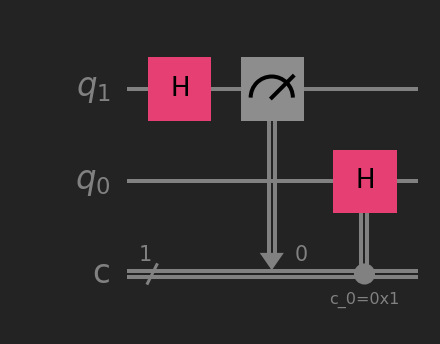

In [28]:
qc = QuantumCircuit(2,1)
qc.h(1)
qc.measure(1,0)
qc.h(0).c_if(0,1)
qc.draw()

In [29]:
ψ = Statevector(qc)

QiskitError: 'Cannot apply instruction with classical bits: measure'

In [30]:
qc_basic = transpile(qc, backend=simulator_basic)

result = simulator_basic.run(qc_basic, shots=1024).result()
counts = result.get_counts()
print(counts)

{'1': 536, '0': 488}


Half of the time: $|0\rangle \otimes |0\rangle$

Half of the time: $|1\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

In [31]:
from qiskit_aer import AerSimulator

simulator_aer = AerSimulator()

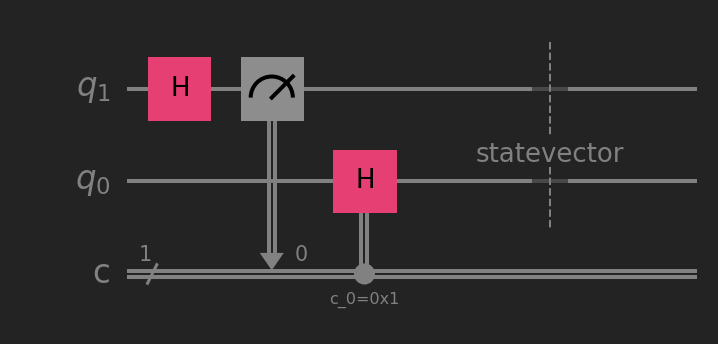

In [32]:
qc = QuantumCircuit(2,1)
qc.h(1)
qc.measure(1,0)
qc.h(0).c_if(0,1)
qc.save_statevector()
qc.draw()

In [33]:
qc_aer = transpile(qc, backend=simulator_aer)

result = simulator_aer.run(qc_aer).result()
ψ = result.get_statevector()
ψ

<IPython.core.display.Latex object>

In [34]:
for i in range(10):
    job = simulator_aer.run(qc_aer, shots=1)
    result = job.result()
    s = result.get_statevector()
    display(s)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

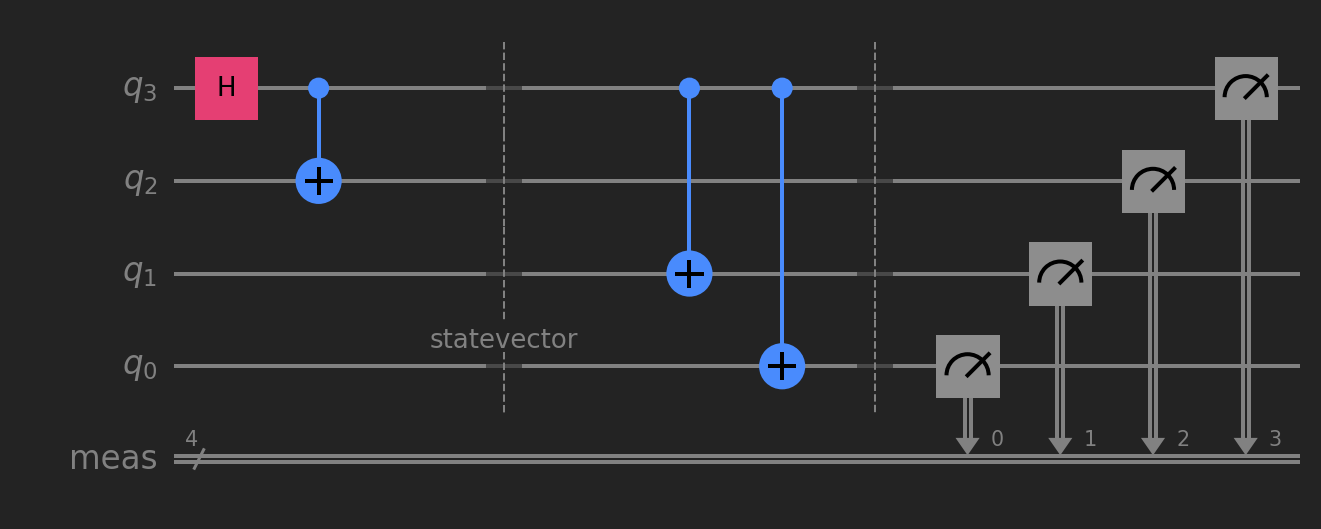

In [35]:
qc = QuantumCircuit(4)
qc.h(3)
qc.cx(3,2)
qc.save_statevector()
qc.cx(3,1)
qc.cx(3,0)
qc.measure_all()
qc.draw()

In [36]:
qc_aer = transpile(qc, backend=simulator_aer)

result = simulator_aer.run(qc_aer).result()
ψ = result.get_statevector()
ψ

<IPython.core.display.Latex object>

#### Efficient Simulators

In [37]:
n = 24
qc = QuantumCircuit(n)
qc.h(n-1)
for i in range(n-1,0,-1):
    qc.cx(i,i-1)

qc.measure_all()
#qc.draw()

In [38]:
%%time 

result = simulator_basic.run(qc, shots = 1024).result()
counts = result.get_counts()
print(counts)

{'000000000000000000000000': 495, '111111111111111111111111': 529}
CPU times: user 7.21 s, sys: 482 ms, total: 7.69 s
Wall time: 7.81 s


In [39]:
%%time 

result = simulator_aer.run(qc, shots = 1024, method='statevector').result()
counts = result.get_counts()
print(counts)

{'000000000000000000000000': 523, '111111111111111111111111': 501}
CPU times: user 7.81 s, sys: 349 ms, total: 8.16 s
Wall time: 862 ms


In [40]:
%%time 

result = simulator_aer.run(qc, shots = 1024, method='matrix_product_state').result()
counts = result.get_counts()
print(counts)

{'111111111111111111111111': 472, '000000000000000000000000': 552}
CPU times: user 122 ms, sys: 17.7 ms, total: 140 ms
Wall time: 16.6 ms


### Noise

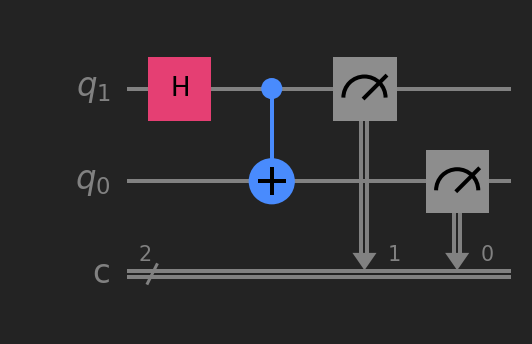

In [41]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.cx(1,0)
qc.measure([1,0],[1,0])
qc.draw()

In [42]:
qc_aer = transpile(qc, backend=simulator_aer)
result_ideal = simulator_aer.run(qc_aer, shots = 1024).result()
counts_ideal = result_ideal.get_counts()

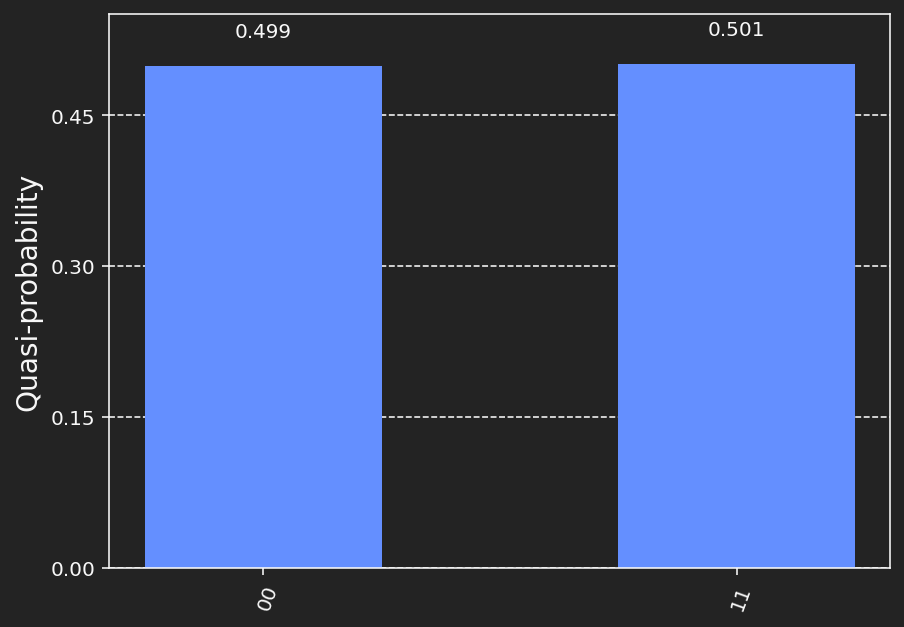

In [43]:
from qiskit.visualization import plot_distribution

plot_distribution(counts_ideal)

In [44]:
from qiskit_aer import noise

In [45]:
prob = 0.1
error = noise.depolarizing_error(prob, 2)

noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['cx'])
basis_gates = noise_model.basis_gates

result_noisy = simulator_aer.run(qc,
                                 shots = 1024,
                                 noise_model=noise_model,
                                 basis_gates=basis_gates).result()

counts_noisy = result_noisy.get_counts()

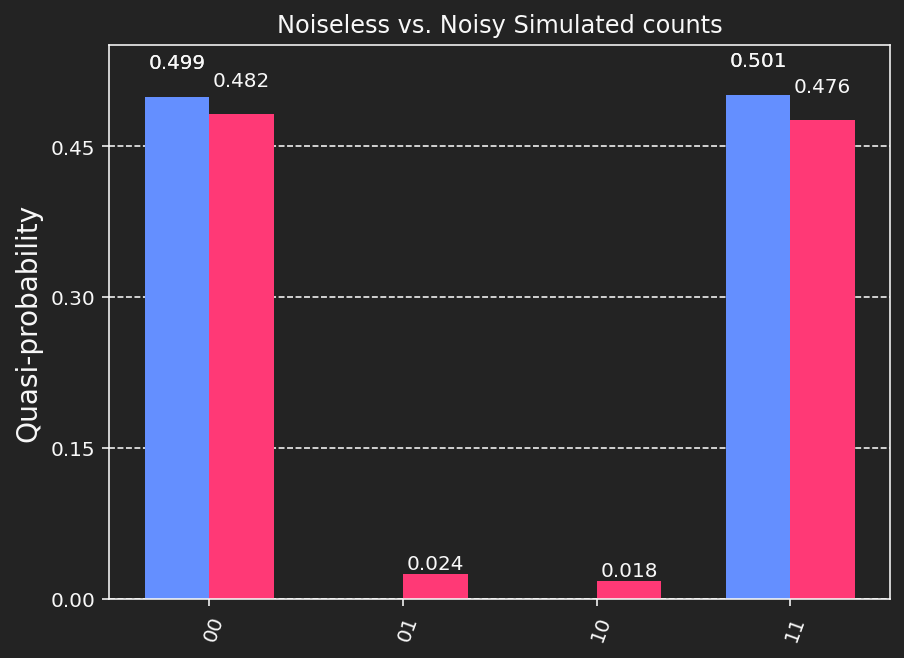

In [46]:
plot_distribution([counts_ideal, counts_noisy], title='Noiseless vs. Noisy Simulated counts')

## Executing in Hardware with Qiskit IBM Provider (deprecated)

In [47]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_distribution
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_aer import AerSimulator, noise

from qiskit_ibm_provider import IBMProvider

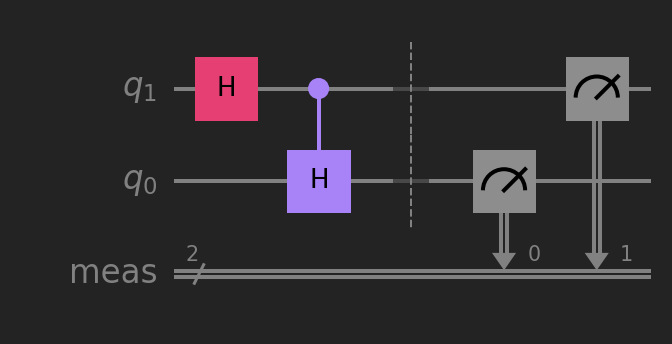

In [48]:
# Create Circuit
qc = QuantumCircuit(2)
qc.h(1)
qc.ch(1,0)
qc.measure_all()
qc.draw()

In [49]:
# Define backends
sim_bsc = BasicSimulator()
sim_aer = AerSimulator()
qpu_osk = IBMProvider().get_backend('ibm_osaka')

In [50]:
# Transpile circuits
qc_bsc = transpile(qc, backend=sim_bsc)
qc_aer = transpile(qc, backend=sim_aer)
qc_osk = transpile(qc, backend=qpu_osk)

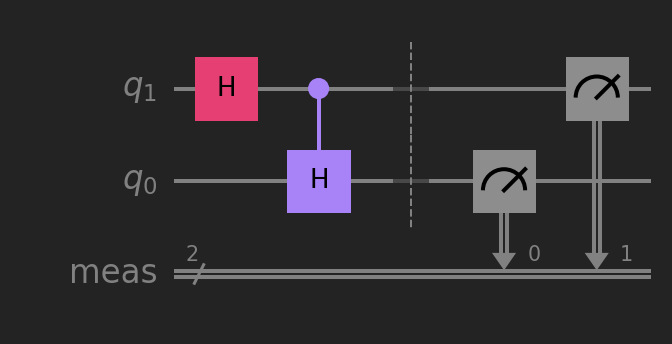

In [51]:
qc_bsc.draw()

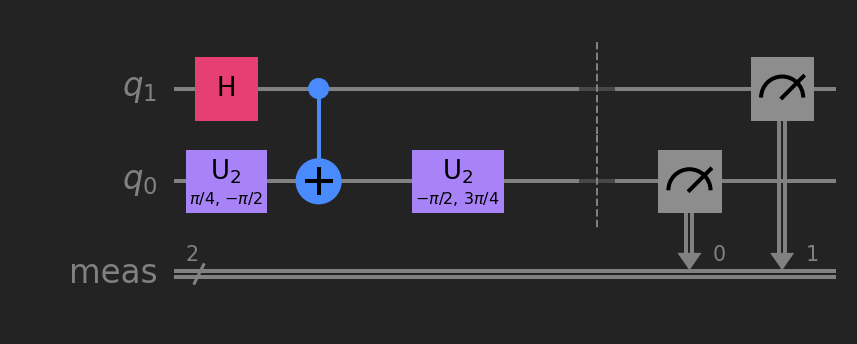

In [52]:
qc_aer.draw()

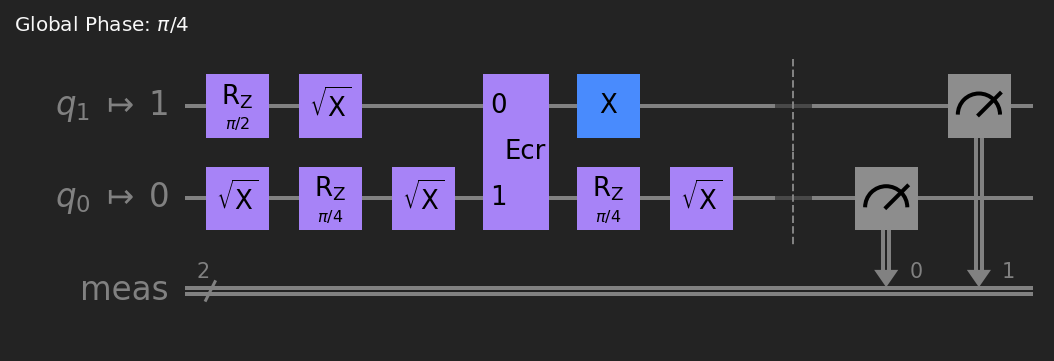

In [53]:
qc_osk.draw(idle_wires=False)

In [54]:
prob = 0.1
error = noise.depolarizing_error(prob, 2)

noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error, ['cx'])

In [55]:
job_bsc = sim_bsc.run(qc_bsc, shots=1024)
job_aer = sim_aer.run(qc_aer, shots=1024, noise_model=noise_model)
#job_osk = qpu_osk.run(qc_osk, shots=1024)

In [56]:
job_osk = IBMProvider().retrieve_job('crnxd95xet6g008aw1jg')

In [57]:
counts_bsc = job_bsc.result().get_counts()
counts_aer = job_aer.result().get_counts()
counts_osk = job_osk.result().get_counts()

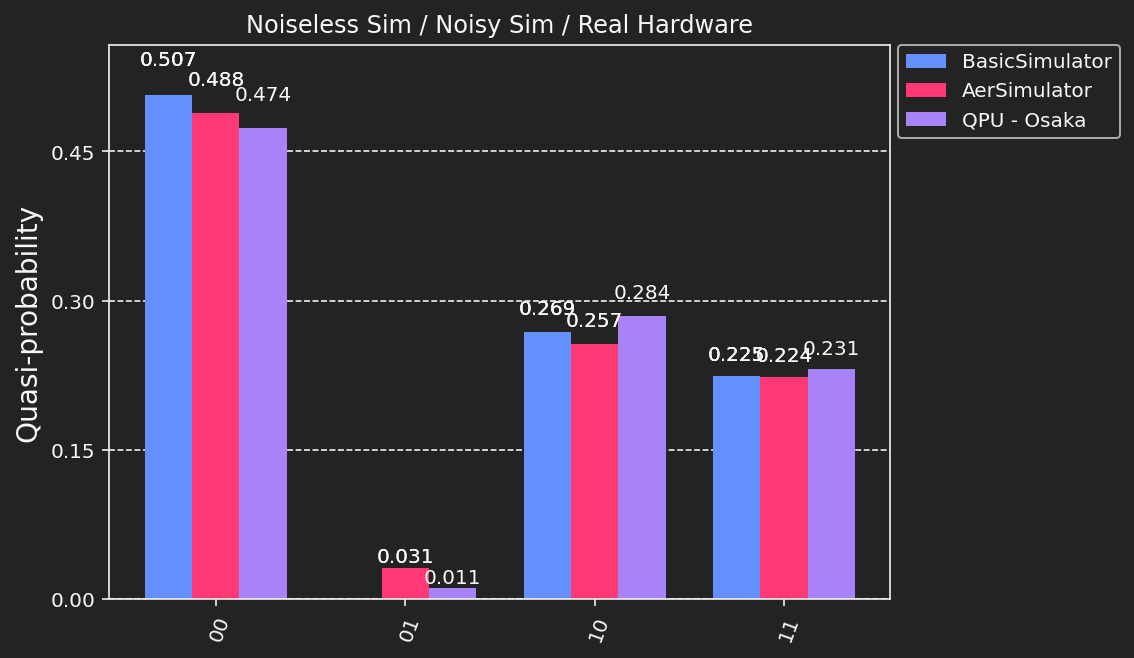

In [58]:
plot_distribution([counts_bsc, counts_aer, counts_osk],
                  legend = ['BasicSimulator', 'AerSimulator', 'QPU - Osaka'],
                  title = 'Noiseless Sim / Noisy Sim / Real Hardware')

## Primitives

In [59]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.measure_all()

In [60]:
from qiskit.primitives import Sampler

sampler = Sampler()
probs = sampler.run(qc).result().quasi_dists
print(probs)

[{0: 1.0}]


In [61]:
from qiskit_ibm_runtime import Sampler
from qiskit_aer import AerSimulator
from qiskit.providers.basic_provider import BasicSimulator


sampler = Sampler(backend=BasicSimulator())
probs = sampler.run(qc).result().quasi_dists
print(probs)

/var/folders/p1/r_g0nd2x0s1b8txg7jw91y2c0000gn/T/ipykernel_79057/517410300.py:6: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(backend=BasicSimulator())


TypeError: cannot pickle 'dict_keys' object

## Primitives

#### The `StatevectorSampler` and `StatevectorEstimator`

In [62]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler, StatevectorEstimator
from qiskit.providers.basic_provider import BasicSimulator

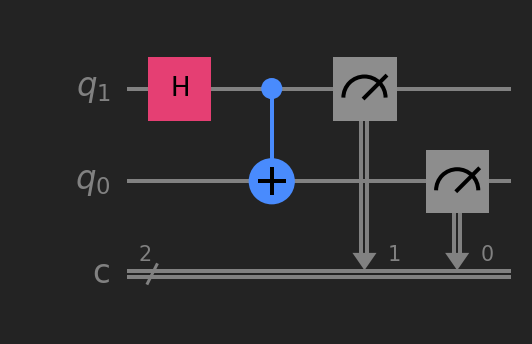

In [63]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.cx(1,0)
qc.measure([1,0],[1,0])
#qc.measure_all()
qc.draw()

In [64]:
simulator = BasicSimulator()
sampler = StatevectorSampler()

In [65]:
job_simulator = simulator.run(qc, shots=1024)

In [66]:
job_sampler = sampler.run([qc], shots=1024)

In [67]:
result_simulator = job_simulator.result()
result_sampler = job_sampler.result()

In [68]:
counts_simulator = result_simulator.get_counts()
print(counts_simulator)

{'00': 499, '11': 525}


In [69]:
counts_sampler = result_sampler[0].data.meas.get_counts()
print(counts_sampler)

AttributeError: 'DataBin' object has no attribute 'meas'

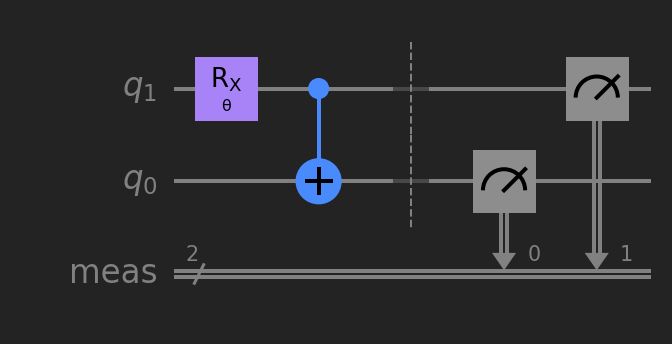

In [70]:
from qiskit import transpile
from qiskit.circuit import Parameter
from math import pi

θ = Parameter('θ')

qc2 = QuantumCircuit(2)
qc2.rx(θ, 1)
qc2.cx(1, 0)
qc2.measure_all()
qc2.draw()

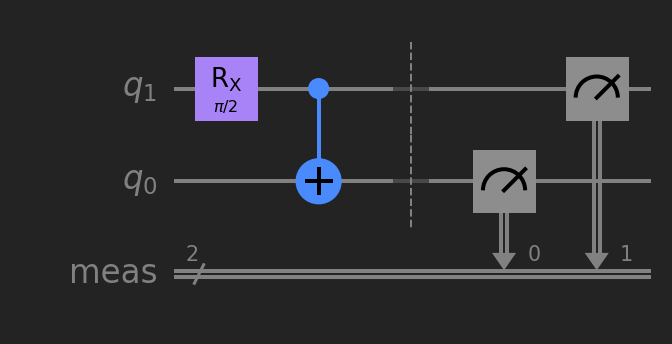

In [71]:
angles = [[pi/4], [pi/3], [pi/2]]

circuits = []
for angle in angles:
    qc_temp = qc2.assign_parameters({θ:angle[0]})
    circuits.append(qc_temp)
    
circuits[2].draw()

In [72]:
circuits_t = transpile(circuits,backend=simulator)
result_simulator = simulator.run(circuits_t, shots=1024).result()

In [73]:
counts_simulator = []

for i, _ in enumerate(angles):
    result_temp = result_simulator.get_counts(i)
    counts_simulator.append(result_temp)
    
print(counts_simulator)

[{'00': 871, '11': 153}, {'00': 771, '11': 253}, {'11': 518, '00': 506}]


In [74]:
result_sampler = sampler.run([(qc2, angles)], shots=1024).result()

In [75]:
counts_sampler = []
for i, _ in enumerate(angles):
    result_temp = result_sampler[0].data.meas.get_counts(i)
    counts_sampler.append(result_temp)
    
print(counts_sampler)

[{'00': 882, '11': 142}, {'00': 785, '11': 239}, {'11': 495, '00': 529}]


In [76]:
result_sampler[0].data.meas.get_counts()

{'00': 2196, '11': 876}

In [77]:
result_sampler = sampler.run([(qc2, angles, 1024),(qc, None, 100)]).result()

In [78]:
result_sampler[0].data.meas.get_counts(0)

{'00': 855, '11': 169}

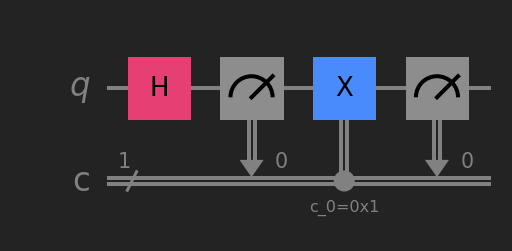

In [79]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.x(0).c_if(0,1)
qc.measure(0,0)
qc.draw()

In [80]:
result_sampler = sampler.run([qc], shots=1024).result()

QiskitError: 'StatevectorSampler cannot handle mid-circuit measurements'

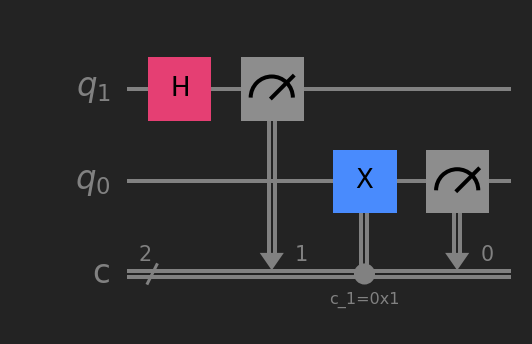

In [81]:
qc = QuantumCircuit(2,2)
qc.h(1)
qc.measure(1,1)
qc.x(0).c_if(1,1)
qc.measure(0,0)
qc.draw()

In [82]:
result_sampler = sampler.run([qc], shots=1024).result()

In [83]:
result_sampler[0].data.c.get_counts()

{'01': 503, '11': 521}

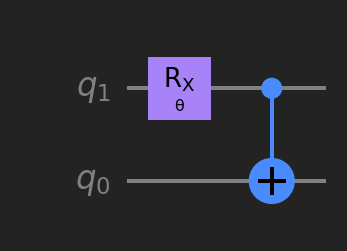

In [96]:
θ = Parameter('θ')

qc2 = QuantumCircuit(2)
qc2.rx(θ, 1)
qc2.cx(1, 0)
#qc2.measure_all()
qc2.draw()

In [97]:
from qiskit.quantum_info import SparsePauliOp

obsv = [[SparsePauliOp(["XX", "IY"], [0.5, 0.5])],
        [SparsePauliOp(["XX"],[1])]]

In [98]:
estimator = StatevectorEstimator()

In [99]:
result_estimator = estimator.run([(qc2, obsv, angles, 0.1)]).result()

In [88]:
result_estimator[0].data.evs

array([[-0.08811988,  0.03067471,  0.13065605],
       [-0.10507227,  0.09752448,  0.02427864]])

## Primitives in Runtime

#### `SamplerV2` and `EstimatorV2`

Required installations:
- `qiskit`
- `qiskit-aer`
- `qiskit-ibm-runtime`

Also, if you want to run on IBM's Hardware need to have an IBM account, and your Token saved:
```python
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account('your-token-here')
```

In [93]:
from math import pi as π
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2, EstimatorV2, QiskitRuntimeService

### Define Sampler Instances

In [94]:
backend_aer = AerSimulator()
backend_osk = QiskitRuntimeService().get_backend('ibm_osaka')

In [95]:
sampler_aer = SamplerV2(backend=backend_aer)
sampler_osk = SamplerV2(backend=backend_osk)

#### Create Circuits

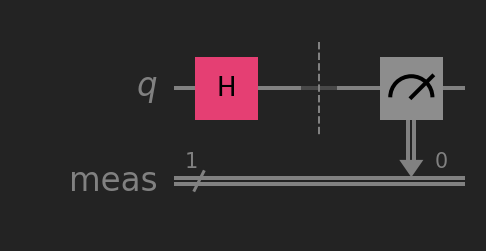

In [96]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.measure_all()
qc1.draw()

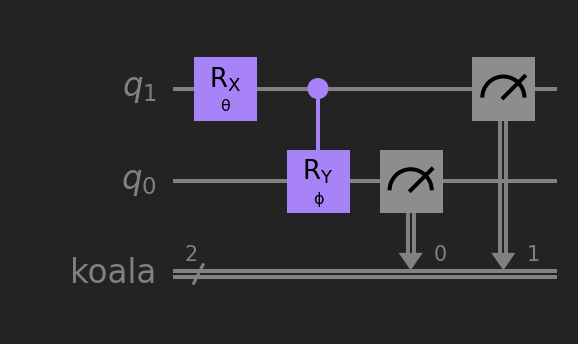

In [97]:
θ = Parameter('θ')
ϕ = Parameter('ϕ')

qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(2, name='koala')

qc2 = QuantumCircuit(qr, cr)
qc2.rx(θ,1)
qc2.cry(ϕ,1,0)
qc2.measure(qr,cr)
qc2.draw()

In [98]:
#angles = [[θ₀, ϕ₀], [θ₁, ϕ₁], [θ₂, ϕ₂],...]
angles = [[π/4, π/2], [π/3,π], [π/2,π]]

In [99]:
qc2.parameters

ParameterView([Parameter(θ), Parameter(ϕ)])

#### Transpile Circuits

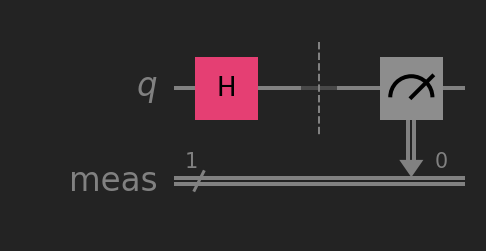

In [100]:
qc1_aer = transpile(qc1, backend=backend_aer)
qc1_aer.draw()

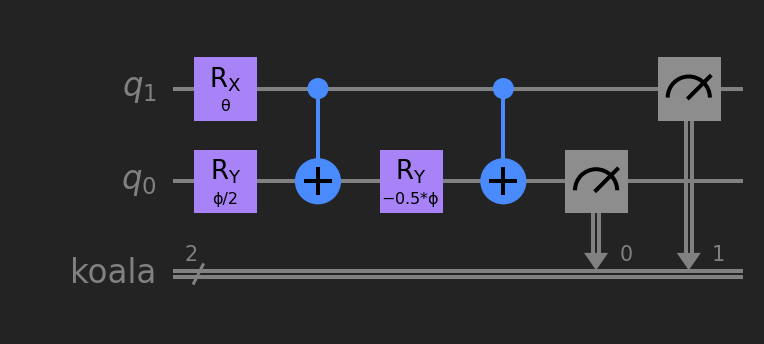

In [101]:
qc2_aer = transpile(qc2, backend=backend_aer)
qc2_aer.draw()

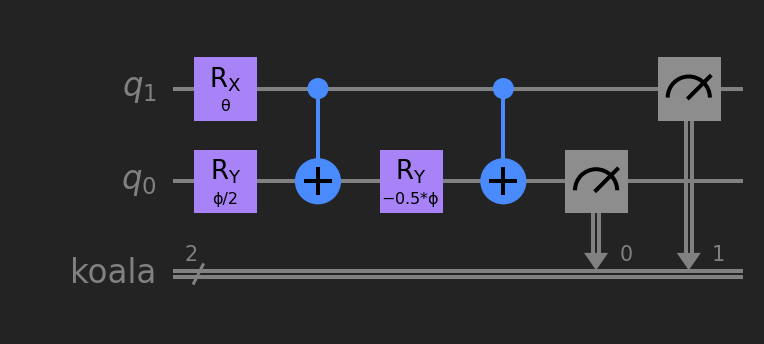

In [102]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend_aer.target
pm = generate_preset_pass_manager(target=target, optimization_level=1)
qc2_aer = pm.run(qc2)
qc2_aer.draw()

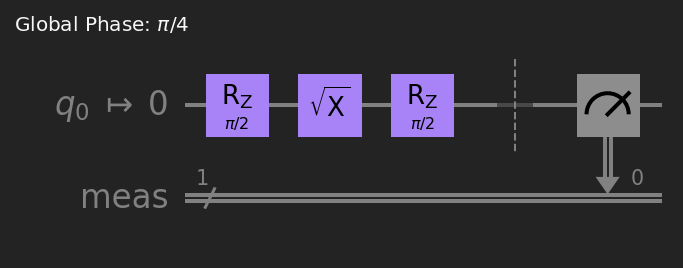

In [103]:
qc1_osk = transpile(qc1, backend=backend_osk)
qc1_osk.draw(idle_wires=False)

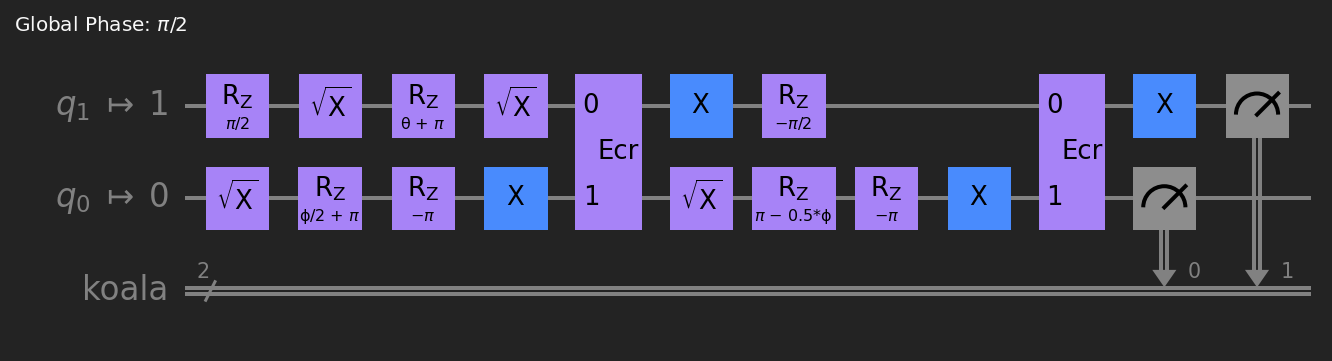

In [104]:
qc2_osk = transpile(qc2, backend=backend_osk)
qc2_osk.draw(idle_wires=False)

### Execute using Sampler

In [105]:
job_aer = sampler_aer.run([(qc1_aer,None,100),(qc2_aer,angles,1000)])
#job_osk = sampler_osk.run([(qc1_osk,None,100),(qc2_osk,angles,1000)])

In [106]:
job_osk = QiskitRuntimeService().job('crrmpn2y7jt0008zxg1g')

In [107]:
result_aer = job_aer.result()
result_osk = job_osk.result()

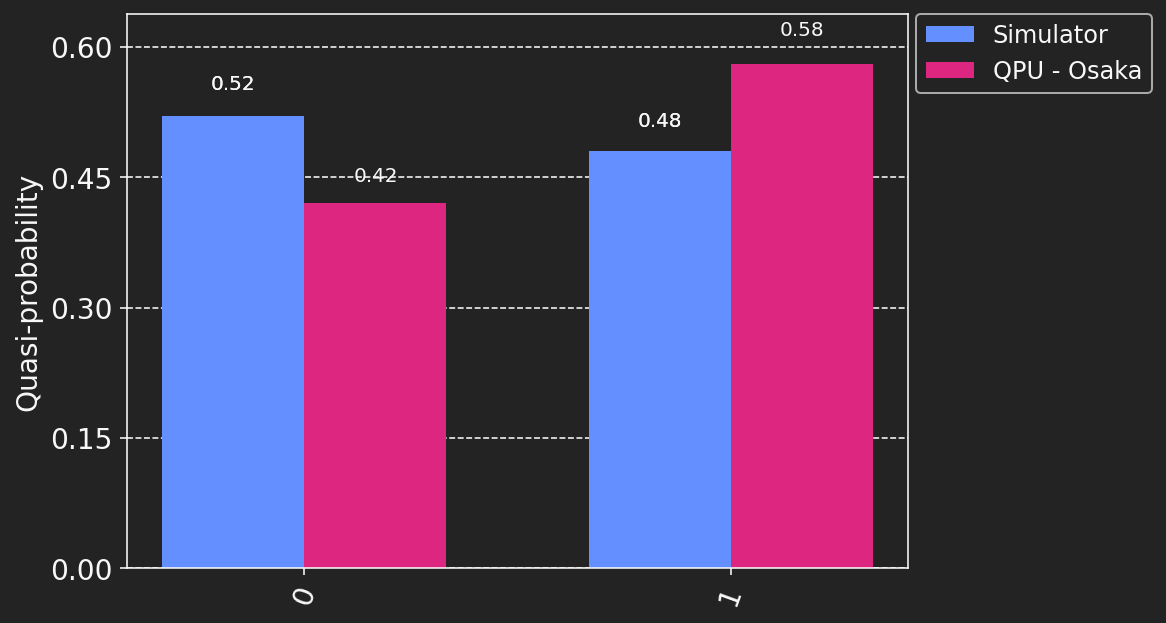

In [108]:
counts_qc1_aer = result_aer[0].data.meas.get_counts()
counts_qc1_osk = result_osk[0].data.meas.get_counts()

plot_distribution([counts_qc1_aer,counts_qc1_osk],
                  legend=['Simulator', 'QPU - Osaka'])

In [109]:
counts_qc2_aer = result_aer[1].data.koala.get_counts()
counts_qc2_osk = result_osk[1].data.koala.get_counts()

print(f'Aer: {counts_qc2_aer}')
print(f'Osaka: {counts_qc2_osk}')

Aer: {'00': 2064, '10': 64, '11': 872}
Osaka: {'00': 2081, '11': 780, '10': 100, '01': 39}


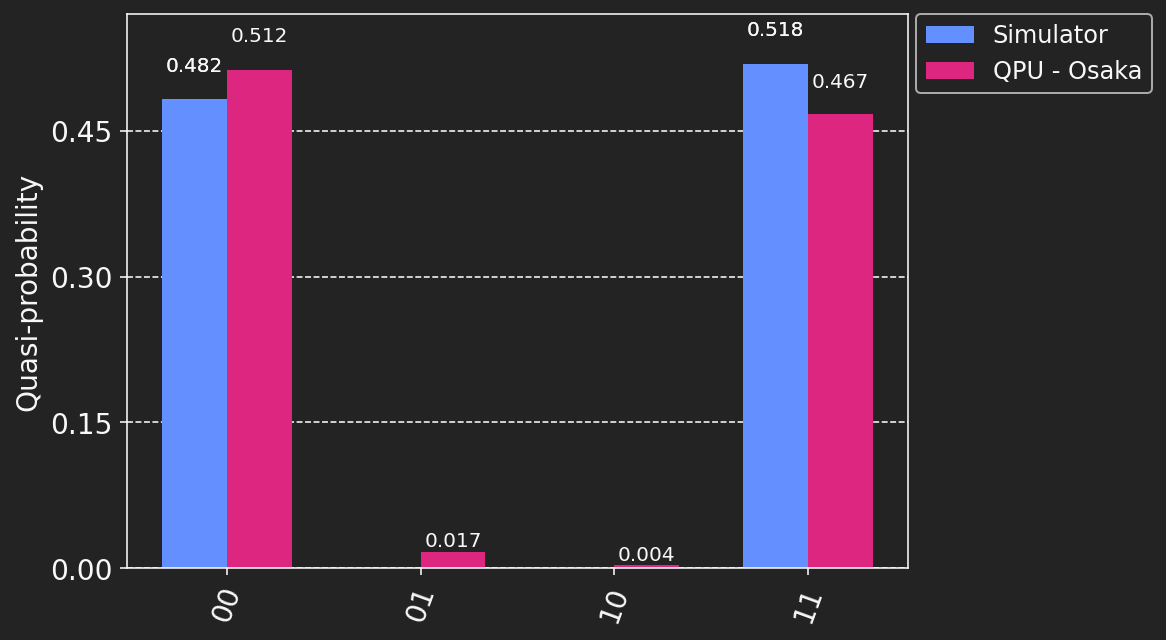

In [112]:
counts_qc2_aer_angle0 = result_aer[1].data.koala.get_counts(2)
counts_qc2_osk_angle0 = result_osk[1].data.koala.get_counts(2)

plot_distribution([counts_qc2_aer_angle0,counts_qc2_osk_angle0],
                  legend=['Simulator', 'QPU - Osaka'])

### Define Estimator Instances

In [113]:
estimator_aer = EstimatorV2(backend=backend_aer)
estimator_osk = EstimatorV2(backend=backend_osk)

In [114]:
obsv_lst = [[SparsePauliOp(["XX", "IY"], [0.5, 0.5])],
            [SparsePauliOp(["XX"],[1])],
            [SparsePauliOp(["IY"],[1])]]

In [115]:
# Map observables to backend layout
layout = qc2_osk.layout

obsv_osk = []
for obsv in obsv_lst:
    obsv_temp = obsv[0].apply_layout(layout)
    print(obsv_temp)
    obsv_osk.append([obsv_temp])

SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIY'],
              coeffs=[0.5+0.j, 0.5+0.j])
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXX'],
              coeffs=[1.+0.j])
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIY'],
              coeffs=[1.+0.j])


In [116]:
job2_aer = estimator_aer.run([(qc2_aer,obsv_lst,angles,0.01)])
#job2_osk = estimator_osk.run([(qc2_osk,obsv_osk,angles,0.01)])

In [117]:
job2_osk = QiskitRuntimeService().job('crs086rx484g008f1v10')

In [118]:
exp_vals_aer = job2_aer.result()[0].data.evs
print(exp_vals_aer)

[[-0.0025  0.0043  0.0072]
 [ 0.0012  0.012   0.008 ]
 [-0.0062 -0.0034  0.0064]]


In [119]:
exp_vals_osk = job2_osk.result()[0].data.evs
print(exp_vals_osk)

[[0.04339367 0.04154562 0.03068833]
 [0.02565629 0.03731824 0.02915487]
 [0.06113106 0.04577301 0.03222179]]


### Sessions

In [120]:
from qiskit_ibm_runtime import Session
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

In [121]:
backend_man = FakeManilaV2()
sampler_man = SamplerV2(backend=backend_man)

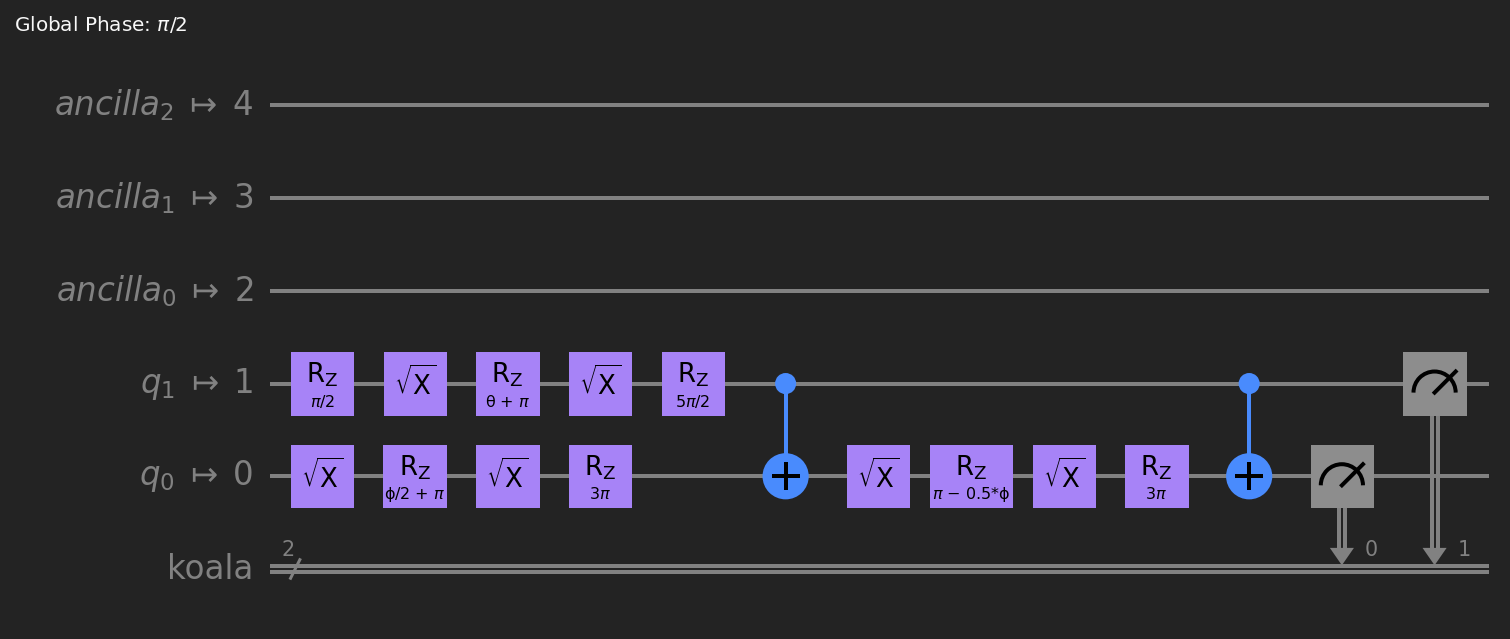

In [122]:
qc2_man = transpile(qc2, backend=backend_man)
qc2_man.draw()

In [123]:
obsv_man = [[obsv[0].apply_layout(qc2_man.layout)] for obsv in obsv_lst]
print(obsv_man)

[[SparsePauliOp(['IIIXX', 'IIIIY'],
              coeffs=[0.5+0.j, 0.5+0.j])], [SparsePauliOp(['IIIXX'],
              coeffs=[1.+0.j])], [SparsePauliOp(['IIIIY'],
              coeffs=[1.+0.j])]]


In [124]:
with Session(backend=backend_man) as session:
    # Submit a request to the Sampler primitive within the session.
    sampler = SamplerV2(session=session)
    job = sampler.run([(qc2_man,angles,1000)])
    pub_result = job.result()[0]
    print(f"1st Circuit Counts: \n {pub_result.data.koala.get_counts(0)} \n")
    
    # Submit a request to the Estimator primitive within the session.
    estimator = EstimatorV2(session=session)
    job = estimator.run([(qc2_man,obsv_man,angles,0.01)])
    pub_result = job.result()[0]
    print(f"Expectation values: \n {pub_result.data.evs}")

/Users/diemilio/miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit_ibm_runtime/session.py:156: UserWarning: Session is not supported in local testing mode or when using a simulator.
  warnings.warn(


1st Circuit Counts: 
 {'10': 98, '00': 761, '11': 61, '01': 80} 

Expectation values: 
 [[0.0924 0.0869 0.0896]
 [0.0108 0.003  0.0048]
 [0.174  0.1708 0.1744]]
